In [1]:
#import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Netflix Dataset.csv', encoding='utf-8')

####understanding the dataset

In [3]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
print("The no. of rows and columns in dataset:", df.shape)

The no. of rows and columns in dataset: (7789, 11)


In [6]:
print("The total no. of values in the dataset:", df.size)

The total no. of values in the dataset: 85679


In [7]:
print("Column names:",df.columns)

Column names: Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


In [8]:
df.dtypes

,0
Show_Id,object
Category,object
Title,object
Director,object
Cast,object
Country,object
Release_Date,object
Rating,object
Duration,object
Type,object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [10]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


<Axes: >

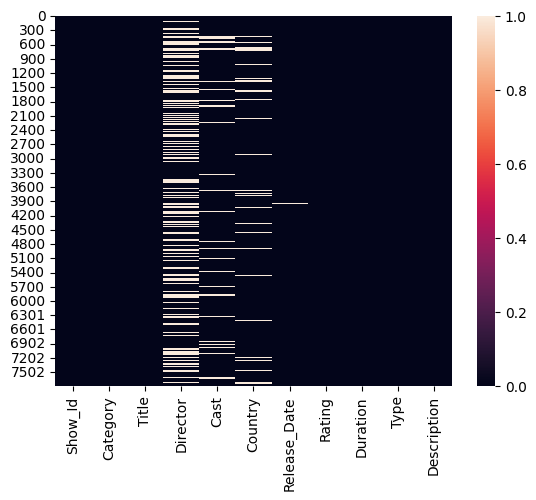

In [13]:
#heatmap for the null values
sns.heatmap(df.isnull())

In [14]:
df.fillna({'Director': 'Unknown', 'Cast': 'Unknown'}, inplace=True)

In [15]:
#drop critical nans
df.dropna(subset=['Country', 'Rating', 'Release_Date'], inplace=True)
print(f"Shape after dropping critical NaNs: {df.shape}")

Shape after dropping critical NaNs: (7265, 11)


In [16]:
df['Release_Date'] = df['Release_Date'].str.strip()
df['Date_Added_dt'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [17]:
df['Year_Added'] = df['Date_Added_dt'].dt.year
df.dropna(subset=['Year_Added'], inplace=True)

In [18]:
df['Year_Added'] = df['Year_Added'].astype(int)

CONTENT TRENDS ANALYSIS

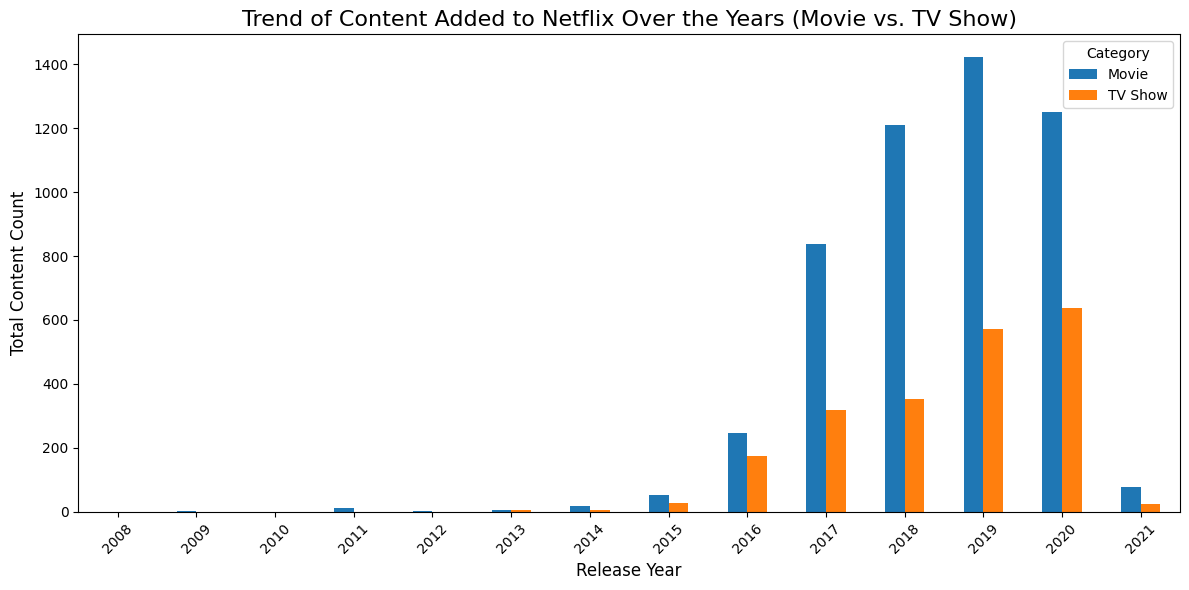

In [19]:
#Analyze the distribution of Movies vs. TV Shows over the years
df_category_year = df.groupby(['Year_Added', 'Category']).size().unstack()

plt.figure(figsize=(12, 6))
df_category_year.plot(kind='bar', stacked=False, figsize=(12, 6), ax=plt.gca())
plt.title('Trend of Content Added to Netflix Over the Years (Movie vs. TV Show)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total Content Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

/tmp/ipython-input-715700026.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


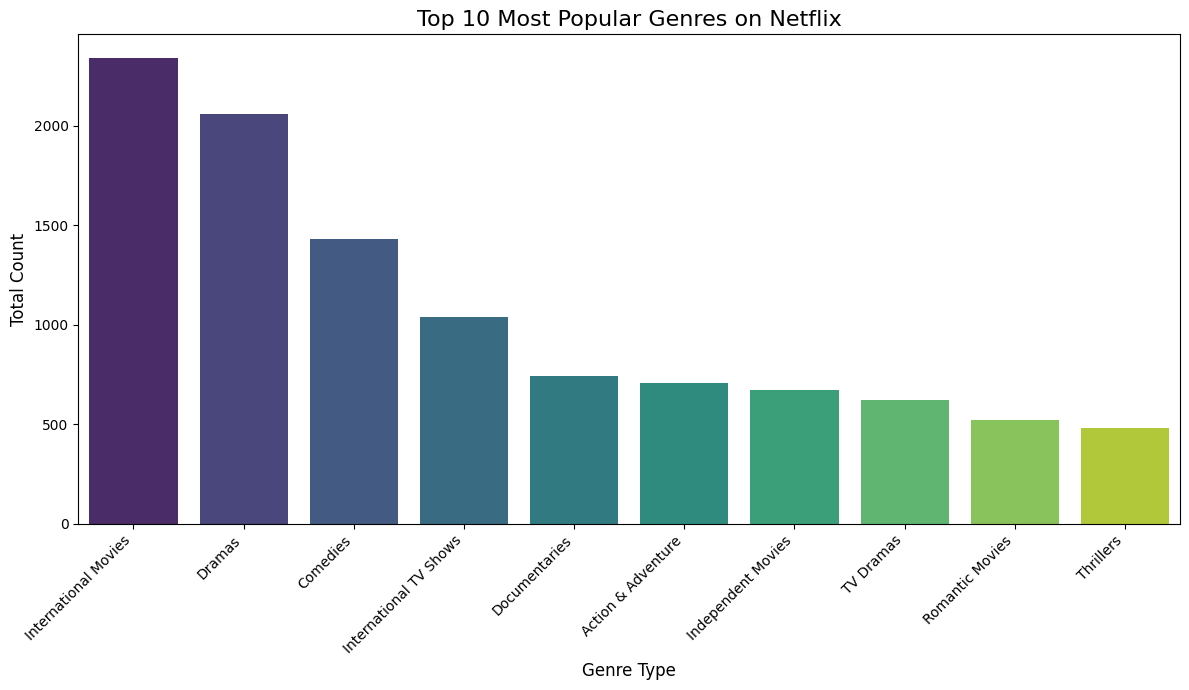

In [20]:
#Identify the most common genres
df_genre = df.copy()
df_genre['Type'] = df_genre['Type'].str.split(', ')
df_genre = df_genre.explode('Type')
top_genres = df_genre['Type'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Most Popular Genres on Netflix', fontsize=16)
plt.xlabel('Genre Type', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-311542476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma')


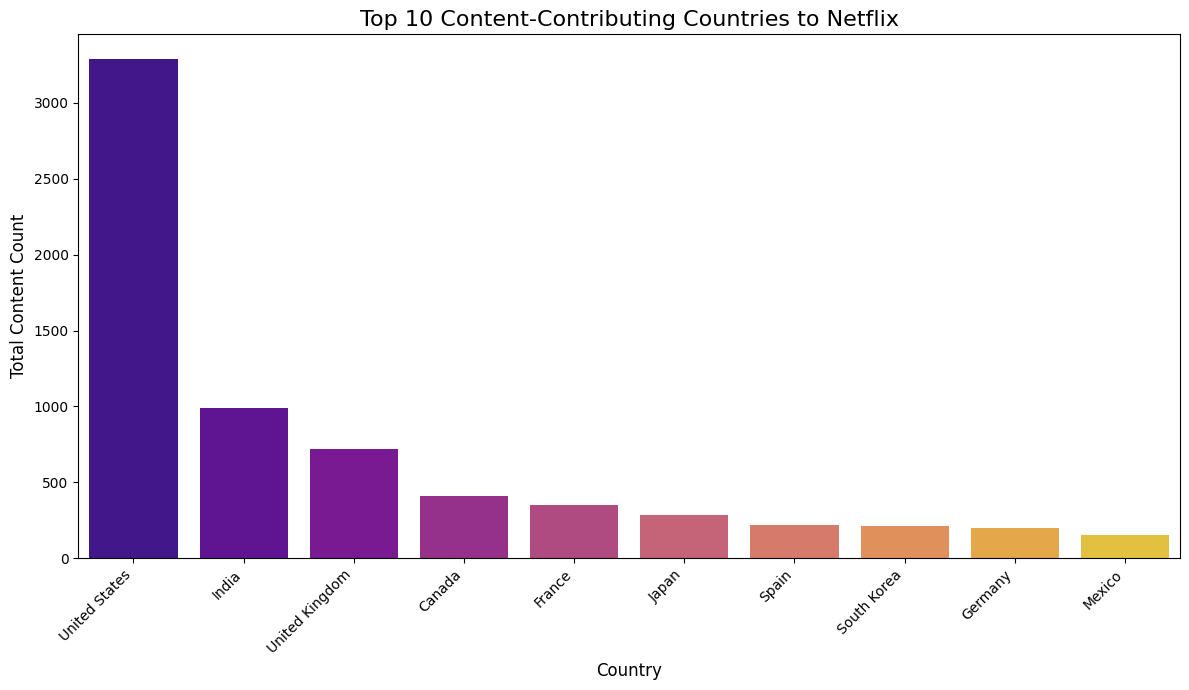

In [21]:
#Compare country-wise contributions
df_country = df.copy()
df_country['Country'] = df_country['Country'].str.split(',')
df_country = df_country.explode('Country')
df_country['Country'] = df_country['Country'].str.strip()
df_country = df_country[df_country['Country'] != 'Unknown']
top_countries = df_country['Country'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma')
plt.title('Top 10 Content-Contributing Countries to Netflix', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Content Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-128781015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='Reds_d')


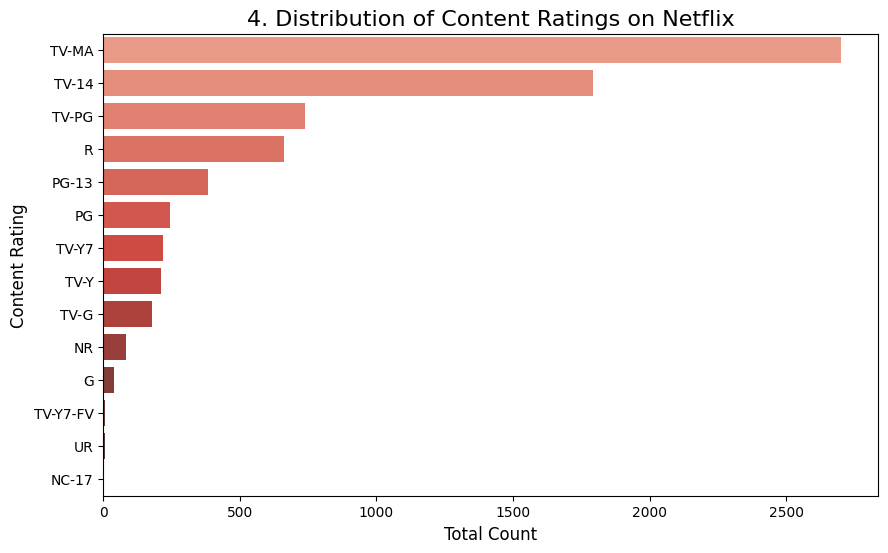

In [22]:
#Audience Analysis: Content Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='Reds_d')
plt.title('4. Distribution of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Total Count', fontsize=12)
plt.ylabel('Content Rating', fontsize=12)
plt.show()

Content Duration Analysis

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2658188749.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_movies['Duration_min'] = df_movies['Duration'].str.extract('(\d+)').astype(int)


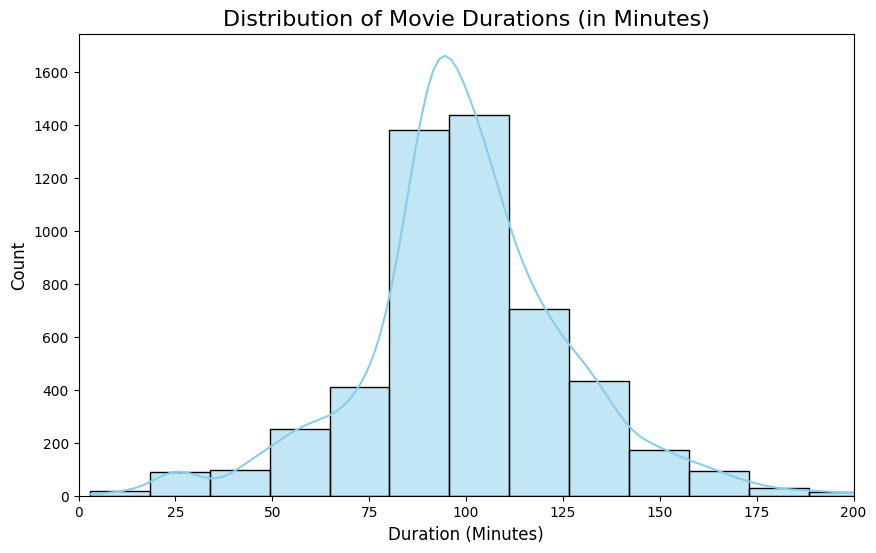

Insight: Reveals the average content length preferred by Netflix (e.g., classic 90-110 min feature films).


In [23]:
#Movie Duration (in minutes)
df_movies = df[df['Category'] == 'Movie'].copy()
df_movies['Duration_min'] = df_movies['Duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(df_movies['Duration_min'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations (in Minutes)', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlim(0, 200)
plt.show()
print("Insight: Reveals the average content length preferred by Netflix (e.g., classic 90-110 min feature films).")

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1194635484.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_tv['Duration_seasons'] = df_tv['Duration'].str.extract('(\d+)').astype(int)
/tmp/ipython-input-1194635484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Duration_seasons', data=df_tv, order=df_tv['Duration_seasons'].value_counts().index, palette='rocket')


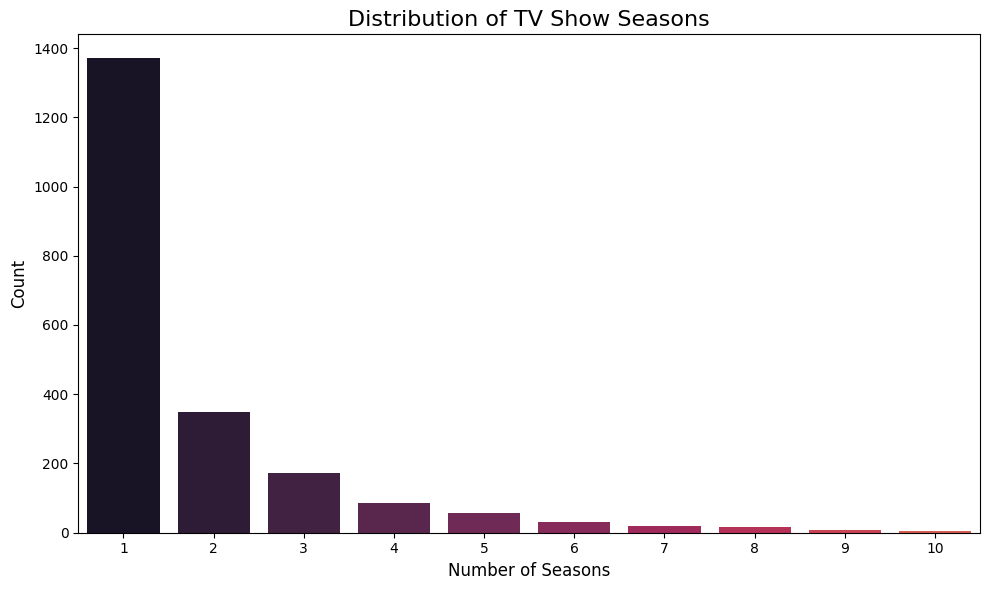

Insight: Shows the high frequency of single-season shows (mini-series or cancelled shows), which impacts retention strategy.


In [24]:
# TV Show Duration (in seasons)
df_tv = df[df['Category'] == 'TV Show'].copy()
df_tv['Duration_seasons'] = df_tv['Duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(10, 6))
sns.countplot(x='Duration_seasons', data=df_tv, order=df_tv['Duration_seasons'].value_counts().index, palette='rocket')
plt.title('Distribution of TV Show Seasons', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.xlim(-0.5, 9.5)
plt.tight_layout()
plt.show()
print("Insight: Shows the high frequency of single-season shows (mini-series or cancelled shows), which impacts retention strategy.")

Genre Popularity over Time

In [25]:
# Identify the top 5 most common genres overall
top_5_genres = df_genre['Type'].value_counts().head(5).index

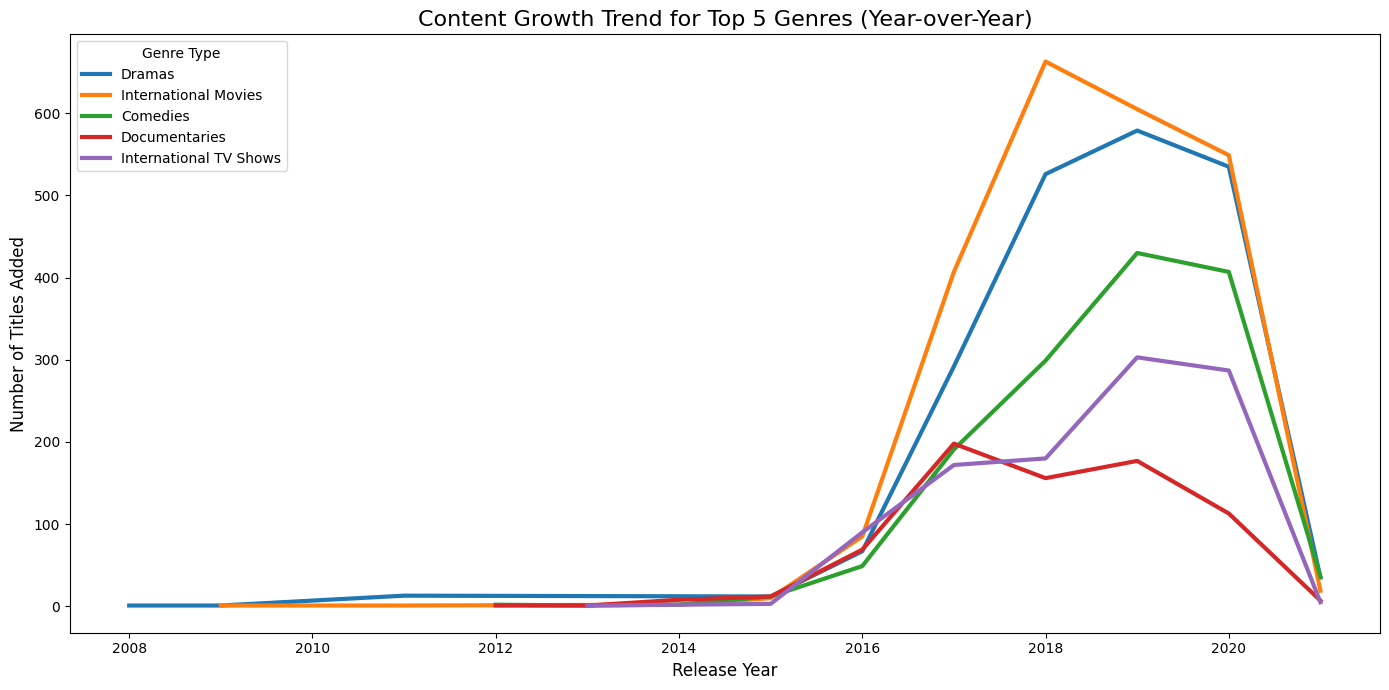

Insight: Crucial for identifying which genres are seeing a recent surge (e.g., 'Stand-Up Comedy' or 'Action').


In [26]:
df_genre_trend = df_genre[df_genre['Type'].isin(top_5_genres)]

df_genre_trend_yearly = df_genre_trend.groupby(['Year_Added', 'Type']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.lineplot(x='Year_Added', y='Count', hue='Type', data=df_genre_trend_yearly, linewidth=3)
plt.title('Content Growth Trend for Top 5 Genres (Year-over-Year)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(title='Genre Type')
plt.tight_layout()
plt.show()
print("Insight: Crucial for identifying which genres are seeing a recent surge (e.g., 'Stand-Up Comedy' or 'Action').")

International Content Expansion

In [27]:
## Select US and top 4 international content producers from the dataset
key_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'South Korea']

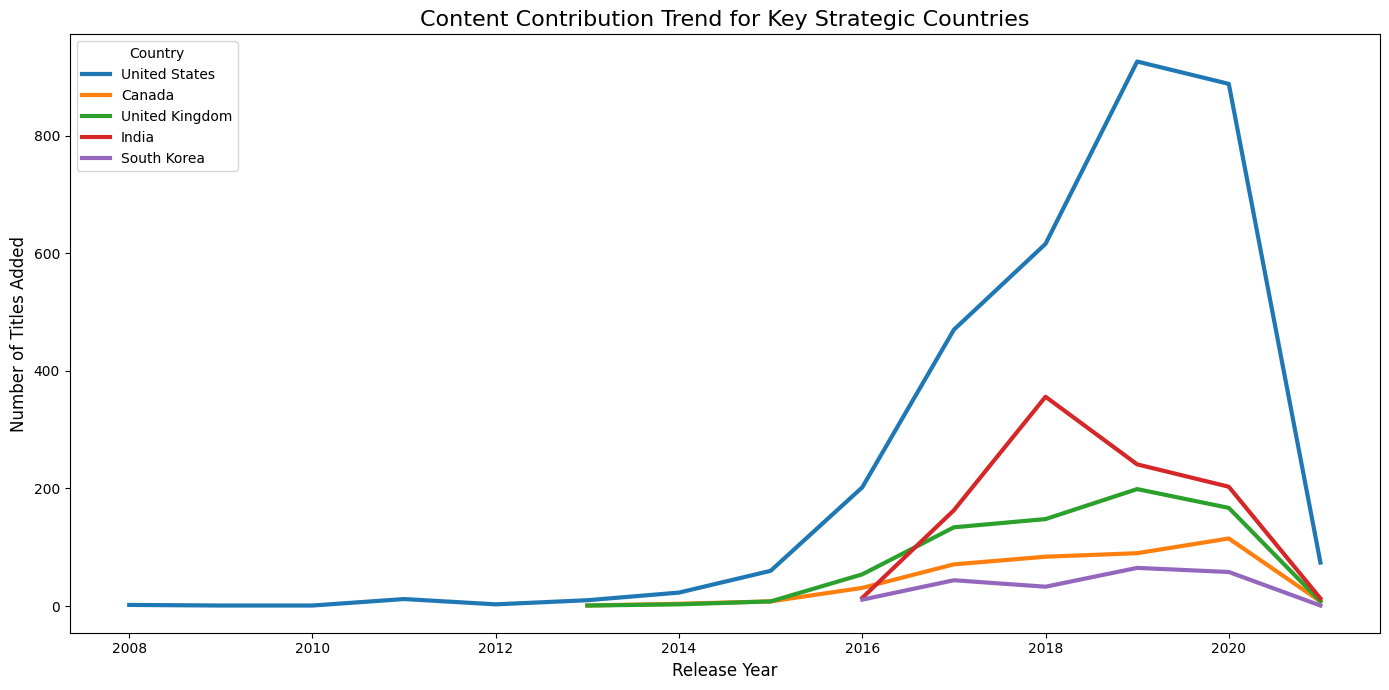

Insight: Clearly shows the years Netflix initiated significant content ramp-up in specific international regions.


In [28]:
df_country_trend = df_country[df_country['Country'].isin(key_countries)]


df_country_trend_yearly = df_country_trend.groupby(['Year_Added', 'Country']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.lineplot(x='Year_Added', y='Count', hue='Country', data=df_country_trend_yearly, linewidth=3)
plt.title('Content Contribution Trend for Key Strategic Countries', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(title='Country')
plt.tight_layout()
plt.show()
print("Insight: Clearly shows the years Netflix initiated significant content ramp-up in specific international regions.")